<a href="https://colab.research.google.com/github/afaale/ML/blob/ML/Titanic_survivors_kaggle_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

In [92]:
data = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test_no_labels = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [162]:
test_no_labels

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [37]:
train = data[:700]
test = data[700:]
train,test

(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 695          696         0       2   
 696          697         0       3   
 697          698         1       3   
 698          699         0       1   
 699          700         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [51]:
train_X = data.drop(['Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)
train_X = train_X.dropna()
train_y = train_X['Survived']
train_X = train_X.drop('Survived', axis=1)
train_X, train_y

(     Pclass     Sex   Age     Fare
 0         3    male  22.0   7.2500
 1         1  female  38.0  71.2833
 2         3  female  26.0   7.9250
 3         1  female  35.0  53.1000
 4         3    male  35.0   8.0500
 ..      ...     ...   ...      ...
 885       3  female  39.0  29.1250
 886       2    male  27.0  13.0000
 887       1  female  19.0  30.0000
 889       1    male  26.0  30.0000
 890       3    male  32.0   7.7500
 
 [714 rows x 4 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [52]:
test_X = test.drop(['Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)
test_X = test_X.dropna()
test_y = test_X['Survived']
test_X = test_X.drop('Survived', axis=1)
test_X, test_y

(     Pclass     Sex   Age      Fare
 700       1  female  18.0  227.5250
 701       1    male  35.0   26.2875
 702       3  female  18.0   14.4542
 703       3    male  25.0    7.7417
 704       3    male  26.0    7.8542
 ..      ...     ...   ...       ...
 885       3  female  39.0   29.1250
 886       2    male  27.0   13.0000
 887       1  female  19.0   30.0000
 889       1    male  26.0   30.0000
 890       3    male  32.0    7.7500
 
 [159 rows x 4 columns],
 700    1
 701    1
 702    0
 703    0
 704    0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 159, dtype: int64)

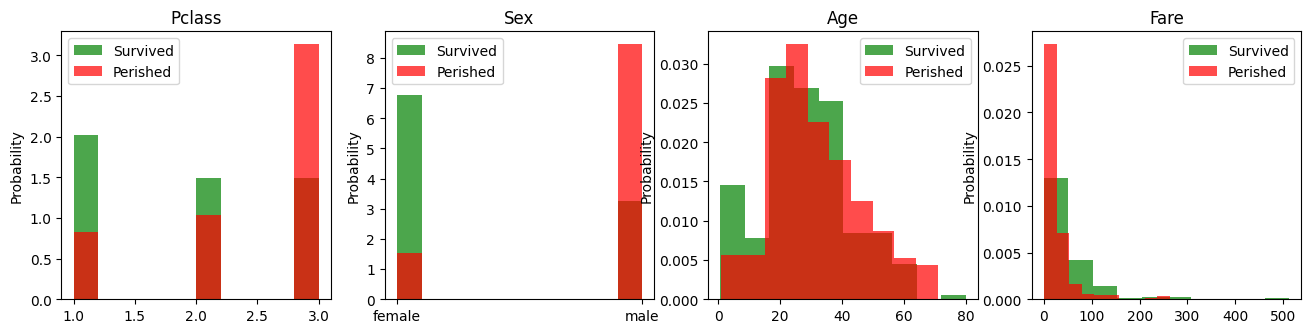

In [40]:
plt.figure(figsize=(16,16))
count = 1

for i in train_X.columns:
    plt.subplot(4,4, count)
    plt.hist(train_X[train_y == 1][i], label='Survived', color= 'green', alpha = 0.7, bins=10, density=True)
    plt.hist(train_X[train_y == 0][i], label='Perished', color= 'red', alpha = 0.7, bins = 10, density=True)
    plt.title(i)
    plt.ylabel('Probability')
    plt.legend()
    count += 1
plt.show()

In [5]:
men = train.loc[train['Sex'] == 'male']['Survived']
surv_men = sum(men)/len(men)
surv_men

0.18890814558058924

In [6]:
women = train.loc[train['Sex'] == 'female']['Survived']
surv_women = sum(women)/len(women)
surv_women

0.7420382165605095

In [61]:
train_X['Sex'] = (train_X['Sex'] == 'male').astype(int)

In [67]:
test_X['Sex'] = (test_X['Sex'] == 'male').astype(int)

In [9]:
testing = train_X[train_X['Fare'] != 0]
'''testing2 = train_X[train_X['Fare'] == 1]
testing3 = train_X[train_X['Fare'] == 2]
testing4 = train_X[train_X['Fare'] == 3]'''

len(testing)

707

In [ ]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

In [77]:
from sklearn.ensemble import RandomForestClassifier

y = train_y

X = np.array(train_X)
X_test = np.array(test_X)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_X.index, 'Survived_true': test_y, 'Survived_pred': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [83]:
accuracy = len(output[output['Survived_true'] == output['Survived_pred']])/len(output)
accuracy

0.89937106918239

In [82]:
output[output['Survived_true'] != output['Survived_pred']]

,PassengerId,Survived_true,Survived_pred
707,707,1,0
712,712,1,0
744,744,1,0
762,762,1,0
772,772,0,1
797,797,1,0
804,804,1,0
807,807,0,1
816,816,0,1
821,821,1,0


In [95]:
#test_X_no_labels = test_no_labels.drop(['Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)
#test_X_no_labels = test_X_no_labels.dropna()

test_X_no_labels = test_no_labels
test_X_no_labels

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [89]:
test_X_no_labels['Sex'] = (test_X_no_labels['Sex'] == 'male').astype(int)
test_X_no_labels

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
...,...,...,...,...
409,3,0,3.0,13.7750
411,1,0,37.0,90.0000
412,3,0,28.0,7.7750
414,1,0,39.0,108.9000


# Model with no labeled test set

In [106]:
train_X = data.drop(['Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)
train_X = train_X.dropna()
train_y = train_X['Survived']
train_X = train_X.drop('Survived', axis=1)
train_X['Sex'] = (train_X['Sex'] == 'male').astype(int)
train_X, train_y

(     Pclass  Sex   Age     Fare
 0         3    1  22.0   7.2500
 1         1    0  38.0  71.2833
 2         3    0  26.0   7.9250
 3         1    0  35.0  53.1000
 4         3    1  35.0   8.0500
 ..      ...  ...   ...      ...
 885       3    0  39.0  29.1250
 886       2    1  27.0  13.0000
 887       1    0  19.0  30.0000
 889       1    1  26.0  30.0000
 890       3    1  32.0   7.7500
 
 [714 rows x 4 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [147]:
new_test = test_X_no_labels.drop(['Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)
new_test

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [148]:
age_mean = new_test['Age'].mean()
for i in range(len(new_test)):
     if new_test['Age'][i]  <= 1000:
         pass
     else:
        new_test['Age'][i] = age_mean.round(1)
new_test

<ipython-input-148-7dc3c441ac60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Age'][i] = mean.round(1)


,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,30.3,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,30.3,8.0500


In [155]:
new_test.isna().any()

Pclass    False
Sex       False
Age       False
Fare      False
dtype: bool

In [153]:
fare_mean = new_test['Fare'].mean().round(4)
fare_mean

35.6272

In [154]:
fare_mean = new_test['Fare'].mean()
for i in range(len(new_test)):
     if new_test['Fare'][i]  <= 1000:
         pass
     else:
        new_test['Fare'][i] = fare_mean.round(1)
new_test

<ipython-input-154-fc1b25713eb5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Fare'][i] = fare_mean.round(1)


,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,30.3,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,30.3,8.0500


In [159]:
new_test['Sex'] = (new_test['Sex'] == 'male').astype(int)
new_test

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
...,...,...,...,...
413,3,1,30.3,8.0500
414,1,0,39.0,108.9000
415,3,1,38.5,7.2500
416,3,1,30.3,8.0500


In [161]:
from sklearn.ensemble import RandomForestClassifier

y = train_y

X = np.array(train_X)
X_test = np.array(test_X_no_labels)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(new_test)

output = pd.DataFrame({'PassengerId': new_test.index + 892, 'Survived_pred': predictions})
output.to_csv('gender_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
